Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,  FloatSlider

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.width=100
plt.style.use('ggplot')

In [9]:
# loading the dataset to a Pandas DataFrame
import pandas as pd

creditcard_data = pd.read_csv('creditcard.csv')

In [12]:
# first 5 rows of the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df = pd.read_csv('creditcard.csv')
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [14]:
# dataset informations
df = pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
# checking the number of missing values in each column
df = pd.read_csv('creditcard.csv')
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [16]:
# distribution of legit transactions & fraudulent transactions
df = pd.read_csv('creditcard.csv')
df.Class.value_counts()


,count
Class,
0,284315
1,492


In [ ]:
df.shape

(51591, 31)

In [ ]:
df.isnull().sum().sum()

20

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51591.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000,51590.000000
mean,29408.888120,-0.244221,0.003887,0.691974,0.183611,-0.259039,0.104715,-0.120474,0.054468,0.108449,-0.054371,0.362256,-0.322181,0.152821,0.159235,0.125138,-0.016224,0.113820,-0.094711,-0.028092,0.047357,-0.028862,-0.106634,-0.039418,0.007995,0.135556,0.020305,0.004140,0.003987,94.014363,0.002908
std,13196.047307,1.887998,1.641193,1.498371,1.398830,1.413486,1.312673,1.278442,1.216566,1.208872,1.138363,1.117580,1.326217,1.115140,1.117947,0.948628,0.950118,1.103080,0.872950,0.820439,0.729076,0.732046,0.636907,0.592622,0.595768,0.438858,0.500884,0.389621,0.332373,253.518524,0.053844
min,0.000000,-56.407510,-72.715728,-32.965346,-5.172595,-42.147898,-26.160506,-26.548144,-41.484823,-9.283925,-18.271168,-4.049895,-17.769143,-3.844974,-19.214325,-4.152532,-13.563273,-25.162799,-9.498746,-4.932733,-15.806476,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.577118,-8.567638,-9.617915,0.000000,0.000000
25%,22655.500000,-0.993823,-0.570329,0.215237,-0.723584,-0.871680,-0.634868,-0.606774,-0.146407,-0.622868,-0.530480,-0.444924,-0.899828,-0.591081,-0.302856,-0.434722,-0.499681,-0.361343,-0.570695,-0.523492,-0.165868,-0.230767,-0.528352,-0.178719,-0.322127,-0.128074,-0.330665,-0.063502,-0.006740,7.680000,0.000000
50%,33767.000000,-0.246892,0.075692,0.793662,0.190588,-0.290140,-0.150447,-0.077622,0.059086,-0.000482,-0.110558,0.321590,-0.018594,0.098283,0.142180,0.240550,0.053463,0.061186,-0.078235,-0.032503,-0.022503,-0.067054,-0.081866,-0.051550,0.062606,0.174933,-0.072844,0.008875,0.022241,25.345000,0.000000
75%,39498.000000,1.154831,0.731302,1.429386,1.066994,0.282184,0.495847,0.424977,0.333436,0.800723,0.416716,1.158366,0.547395,0.864066,0.653344,0.803202,0.547415,0.536719,0.400938,0.480934,0.172761,0.108996,0.307826,0.078873,0.401672,0.421984,0.299365,0.083277,0.076230,86.160000,0.000000
max,45026.000000,1.960497,18.183626,4.101716,16.491217,34.801666,22.529298,36.677268,20.007208,10.392889,13.198226,12.018913,4.846452,4.465413,7.692209,5.784514,6.098529,9.253526,4.295648,5.228342,26.237391,22.614889,5.805795,17.297845,4.014444,5.525093,3.517346,11.135740,33.847808,12910.930000,1.000000


In [17]:
df.dtypes

,0
Time,float64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


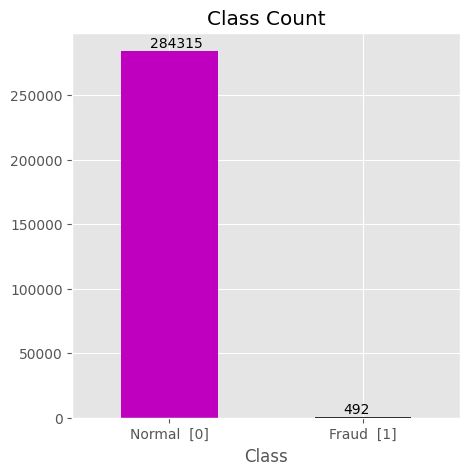

In [18]:
diff_class = df['Class'].value_counts()
diff_class.plot(kind='bar', color=['m', 'k'], figsize=(5, 5))
plt.xticks(range(2), ['Normal  [0]', 'Fraud  [1]'], rotation=0)
for i, v in enumerate(diff_class):
    plt.text(i-0.1, v+3000, str(v))
plt.title('Class Count')
plt.show()

In [19]:
ss = StandardScaler()
df['Amount'] = ss.fit_transform(df[['Amount']])
df['Time'] = ss.fit_transform(df[['Time']])

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction



In [20]:
# separating the data for analysis
legit = creditcard_data[creditcard_data.Class == 0]
fraud = creditcard_data[creditcard_data.Class == 1]

In [21]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [22]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [23]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [24]:
# compare the values for both transactions
creditcard_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [25]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [26]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [27]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
76551,56622.0,1.135291,-2.155847,-0.641878,-2.188860,0.222480,3.882814,-1.873604,0.936671,-1.312961,1.281831,-0.552090,-0.898217,0.575722,-0.691583,0.413256,0.029220,0.071168,0.796817,0.006070,0.205114,0.014728,-0.016818,-0.234758,1.024138,0.433906,-0.051133,0.040616,0.058732,211.50,0
57906,48132.0,-0.520238,0.699604,0.947860,-0.690611,0.402079,-0.806641,1.026602,-0.228574,-0.653995,-0.585040,0.092416,0.523196,0.823380,0.148317,0.819710,-0.396339,0.064447,-1.397522,0.143186,-0.043107,-0.297364,-0.836749,0.252968,0.120706,-0.276157,0.688266,-0.156923,-0.025664,28.98,0
91723,63599.0,-2.060621,0.302064,1.372923,-0.516275,-0.027661,2.031978,-1.017747,1.743880,-0.046573,-1.333112,0.980678,1.108318,-0.662000,0.477193,-0.069987,-0.310129,0.726970,-1.351583,-1.838969,-0.530488,0.225790,0.509757,-0.122274,-1.313289,-0.417099,0.267422,-0.142067,-0.186072,52.11,0
156261,107685.0,2.102575,0.060964,-1.427501,0.416063,0.348344,-0.798198,0.064589,-0.345397,1.969334,-0.345418,-0.046173,-2.621360,1.193886,2.008152,0.124770,-0.131651,0.162639,0.381470,-0.341357,-0.289327,0.068323,0.548435,0.029408,0.535750,0.272415,-0.168712,-0.055185,-0.061416,1.00,0
192980,129941.0,-1.988281,0.413177,-0.178361,0.173024,0.187166,-1.007164,0.357742,0.465978,-2.256006,-0.128634,-1.637943,-0.152182,0.111519,0.933441,-0.632098,-2.163276,0.619255,0.992460,-0.441209,-0.760392,-0.235726,-0.417263,-0.713898,-0.073826,1.056822,-0.288701,-0.134382,-0.345638,83.00,0


In [28]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [29]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [30]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,95388.376016,-0.006271,0.084034,-0.038565,-0.054885,0.031882,0.117494,-0.012168,-0.048216,0.110478,-0.011960,-0.030039,0.026575,-0.047179,-0.038916,0.034703,-0.075241,0.093882,-0.055009,-0.029934,0.011960,-0.070986,0.037642,0.033879,-0.011716,0.030785,-0.036367,-0.006162,-0.001425,78.664634
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [31]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [32]:
print(X)

            Time        V1        V2        V3        V4        V5        V6        V7        V8  \
76551    56622.0  1.135291 -2.155847 -0.641878 -2.188860  0.222480  3.882814 -1.873604  0.936671   
57906    48132.0 -0.520238  0.699604  0.947860 -0.690611  0.402079 -0.806641  1.026602 -0.228574   
91723    63599.0 -2.060621  0.302064  1.372923 -0.516275 -0.027661  2.031978 -1.017747  1.743880   
156261  107685.0  2.102575  0.060964 -1.427501  0.416063  0.348344 -0.798198  0.064589 -0.345397   
192980  129941.0 -1.988281  0.413177 -0.178361  0.173024  0.187166 -1.007164  0.357742  0.465978   
...          ...       ...       ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494 -0.882850  0.697211   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536 -1.413170  0.248525   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346 -2.234739  1.210158   


In [33]:
print(Y)

76551     0
57906     0
91723     0
156261    0
192980    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [36]:
model = LogisticRegression()

In [37]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

Accuracy Score



In [39]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9415501905972046


In [41]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9746192893401016


In [43]:
X_train_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [44]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [45]:
X_test_prediction = rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [46]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9695431472081218
